Logistic regression >> https://michael-fuchs-python.netlify.app/2019/11/15/multinomial-logistic-regression/

https://www.askpython.com/python/examples/fitting-a-logistic-regression-model

In [ ]:
from google.colab import files
uploaded = files.upload()#"standardizedallstats.csv"

Saving standardizedallstats.csv to standardizedallstats (1).csv


In [ ]:
from google.colab import files
uploaded = files.upload()#"mergedstats2022.csv"

Saving mergedstats2022.csv to mergedstats2022 (1).csv


In [ ]:
from google.colab import files
uploaded = files.upload()#"standardizedtest2022.csv"

Saving standardizedtest2022.csv to standardizedtest2022 (1).csv


In [ ]:
import pandas as pd
newdf = pd.read_csv("standardizedallstats.csv", encoding="latin-1", delimiter=",")
print(newdf.Year.unique())
newdf = newdf[newdf['Year'] >= 2012] #15 years
newdf = newdf.reset_index()


[1995. 1996. 1997. 1998. 2000. 2001. 2004. 2005. 2006. 2002. 2003. 1991.
 1992. 1993. 1994. 1999. 2017. 2010. 2011. 2012. 2013. 2014. 2015. 2008.
 2009. 2016. 2018. 2019. 2020. 2021. 2007.]


In [ ]:
import pandas as pd #stats used for creating a table at the end, NOT FOR PREDICTION
stats2022 = pd.read_csv("mergedstats2022.csv", encoding="latin-1", delimiter=",")

In [ ]:
import pandas as pd
test1 = pd.read_csv("standardizedtest2022.csv", encoding="latin-1", delimiter=",")
test1['TS%'] = test1['TS%'].fillna(0)
test1

In [ ]:
player_list = newdf.Player
index_list = newdf.index
zip_player_index = zip(index_list, player_list)
dict_player_index = dict(zip_player_index)
#dict_player_index

In [ ]:
year_list = newdf.Year
zip_year_index = zip(index_list, year_list)
dict_year_index = dict(zip_year_index)
#dict_year_index

In [ ]:
team_list = newdf.Tm
zip_team_index = zip(index_list, team_list)
dict_team_index = dict(zip_team_index)
#dict_team_index

In [ ]:
#newdf.info()

In [ ]:
newdf.columns

Index(['index', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Player', 'Pos', 'Age', 'Tm',
       'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'Year', 'Pts Won', 'Pts Max', 'Share',
       'Team', 'W', 'L', 'W/L%', 'GB', 'PS/G', 'PA/G', 'SRS', 'TS%', 'Rank',
       'MVP'],
      dtype='object')

In [ ]:
categorical = [val for val in newdf.columns[newdf.dtypes == "O"]]
categorical

['Player', 'Pos', 'Tm', 'Team']

# remove player column value on player too because it doesn't play the role.

In [ ]:
newdf = newdf.drop(["Player"], axis =1 )
newdf

,index,Unnamed: 0.1,Unnamed: 0.1.1,Pos,Age,Tm,G,GS,MP,FG,...,W,L,W/L%,GB,PS/G,PA/G,SRS,TS%,Rank,MVP
0,6829,0,-1.428326,C,-0.554215,DAL,-1.279530,-0.881347,-1.379770,-1.074999,...,-0.703571,0.703571,-0.706557,1.064889,-1.872876,-1.230109,-0.587617,-0.527129,0.0,0
1,6830,1,-1.428099,PF,-1.244852,DAL,-2.044464,-0.881347,-1.832327,-1.445663,...,-0.703571,0.703571,-0.706557,1.064889,-1.872876,-1.230109,-0.587617,-5.835876,0.0,0
2,6831,2,-1.427872,SG,0.366635,DAL,0.330859,-0.219692,-0.816833,-1.028667,...,-0.703571,0.703571,-0.706557,1.064889,-1.872876,-1.230109,-0.587617,-0.433768,0.0,0
3,6832,3,-1.427645,PG,1.517696,DAL,0.451638,-0.881347,-0.353238,-0.472672,...,-0.703571,0.703571,-0.706557,1.064889,-1.872876,-1.230109,-0.587617,0.269501,0.0,0
4,6833,4,-1.427418,PF,2.668758,DAL,0.008781,0.999146,0.717446,1.102647,...,-0.703571,0.703571,-0.706557,1.064889,-1.872876,-1.230109,-0.587617,-0.018536,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5013,13629,535,1.594423,PG,1.568638,SAS,1.222186,-0.819807,0.534912,0.175692,...,-0.265344,0.265344,-0.268188,-0.216378,-0.212679,0.180358,-0.289204,0.234289,0.0,0
5014,13630,536,1.594665,SG,-0.378637,SAS,-1.095907,-0.862955,-1.474066,-1.060862,...,-0.265344,0.265344,-0.268188,-0.216378,-0.212679,0.180358,-0.289204,-0.105987,0.0,0
5015,13631,537,1.594907,PF,2.055457,SAS,0.980718,-0.819807,0.191129,0.388891,...,-0.265344,0.265344,-0.268188,-0.216378,-0.212679,0.180358,-0.289204,-0.124223,0.0,0
5016,13632,538,1.595149,PG,-1.108865,SAS,-0.274916,-0.819807,-1.345147,-0.975582,...,-0.265344,0.265344,-0.268188,-0.216378,-0.212679,0.180358,-0.289204,-0.063138,0.0,0


In [ ]:
indexTest_list = test1.index
player_list = test1.Player
zip_player_index22 = zip(indexTest_list, player_list)
dict_player_index22 = dict(zip_player_index22)
#dict_player_index22

{0: 'Aaron Gordon',
 1: 'Austin Rivers',
 2: 'Bol Bol',
 3: 'Bones Hyland',
 4: 'Bryn Forbes',
 5: 'Carlik Jones',
 6: 'Davon Reed',
 7: 'DeMarcus Cousins',
 8: 'Facundo Campazzo',
 9: 'JaMychal Green',
 10: 'James Ennis III',
 11: 'Jeff Green',
 12: 'Markus Howard',
 13: 'Michael Porter Jr.',
 14: 'Monte Morris',
 15: 'Nikola Jokic',
 16: 'PJ Dozier',
 17: 'Petr Cornelie',
 18: 'Vlatko Cancar',
 19: 'Will Barton',
 20: 'Zeke Nnaji',
 21: 'Aaron Henry',
 22: 'Charles Bassey',
 23: 'Charlie Brown Jr.',
 24: 'Danny Green',
 25: 'DeAndre Jordan',
 26: 'Furkan Korkmaz',
 27: 'Georges Niang',
 28: 'Isaiah Joe',
 29: 'Jaden Springer',
 30: 'James Harden',
 31: 'Joel Embiid',
 32: 'Matisse Thybulle',
 33: 'Myles Powell',
 34: 'Paul Millsap',
 35: 'Paul Reed',
 36: 'Shake Milton',
 37: 'Tobias Harris',
 38: 'Tyrese Maxey',
 39: 'Willie Cauley-Stein',
 40: 'Aaron Holiday',
 41: 'Abdel Nader',
 42: 'Bismack Biyombo',
 43: 'Cameron Johnson',
 44: 'Cameron Payne',
 45: 'Chandler Hutchison',
 46: '

In [ ]:
newdf.Pos.unique()

array(['C', 'PF', 'SG', 'PG', 'SF', 'PF-C', 'SF-PF', 'C-PF', 'PF-SF',
       'SG-SF', 'SG-PG', 'PG-SG', 'SF-SG', 'SG-PF', 'SF-C'], dtype=object)

# Shift column MVP to the first column

In [ ]:
first_column = newdf.pop('MVP')
  
# insert column using insert(position,column_name,
# first_column) function
newdf.insert(0, 'MVP', first_column)
df = newdf.rename(columns={'TS_percent':'TS%'})

df

,MVP,index,Unnamed: 0.1,Unnamed: 0.1.1,Pos,Age,Tm,G,GS,MP,...,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,TS%,Rank
0,0,6829,0,-1.428326,C,-0.554215,DAL,-1.279530,-0.881347,-1.379770,...,Dallas Mavericks,-0.703571,0.703571,-0.706557,1.064889,-1.872876,-1.230109,-0.587617,-0.527129,0.0
1,0,6830,1,-1.428099,PF,-1.244852,DAL,-2.044464,-0.881347,-1.832327,...,Dallas Mavericks,-0.703571,0.703571,-0.706557,1.064889,-1.872876,-1.230109,-0.587617,-5.835876,0.0
2,0,6831,2,-1.427872,SG,0.366635,DAL,0.330859,-0.219692,-0.816833,...,Dallas Mavericks,-0.703571,0.703571,-0.706557,1.064889,-1.872876,-1.230109,-0.587617,-0.433768,0.0
3,0,6832,3,-1.427645,PG,1.517696,DAL,0.451638,-0.881347,-0.353238,...,Dallas Mavericks,-0.703571,0.703571,-0.706557,1.064889,-1.872876,-1.230109,-0.587617,0.269501,0.0
4,0,6833,4,-1.427418,PF,2.668758,DAL,0.008781,0.999146,0.717446,...,Dallas Mavericks,-0.703571,0.703571,-0.706557,1.064889,-1.872876,-1.230109,-0.587617,-0.018536,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5013,0,13629,535,1.594423,PG,1.568638,SAS,1.222186,-0.819807,0.534912,...,San Antonio Spurs,-0.265344,0.265344,-0.268188,-0.216378,-0.212679,0.180358,-0.289204,0.234289,0.0
5014,0,13630,536,1.594665,SG,-0.378637,SAS,-1.095907,-0.862955,-1.474066,...,San Antonio Spurs,-0.265344,0.265344,-0.268188,-0.216378,-0.212679,0.180358,-0.289204,-0.105987,0.0
5015,0,13631,537,1.594907,PF,2.055457,SAS,0.980718,-0.819807,0.191129,...,San Antonio Spurs,-0.265344,0.265344,-0.268188,-0.216378,-0.212679,0.180358,-0.289204,-0.124223,0.0
5016,0,13632,538,1.595149,PG,-1.108865,SAS,-0.274916,-0.819807,-1.345147,...,San Antonio Spurs,-0.265344,0.265344,-0.268188,-0.216378,-0.212679,0.180358,-0.289204,-0.063138,0.0


Remove dependent variables  >> pts won, pts max,share and rank

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5018 entries, 0 to 5017
Data columns (total 46 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MVP             5018 non-null   int64  
 1   index           5018 non-null   int64  
 2   Unnamed: 0.1    5018 non-null   int64  
 3   Unnamed: 0.1.1  5018 non-null   float64
 4   Pos             5018 non-null   object 
 5   Age             5018 non-null   float64
 6   Tm              5018 non-null   object 
 7   G               5018 non-null   float64
 8   GS              5018 non-null   float64
 9   MP              5018 non-null   float64
 10  FG              5018 non-null   float64
 11  FGA             5018 non-null   float64
 12  FG%             5018 non-null   float64
 13  3P              5018 non-null   float64
 14  3PA             5018 non-null   float64
 15  3P%             5018 non-null   float64
 16  2P              5018 non-null   float64
 17  2PA             5018 non-null   f

we want to only look at these features

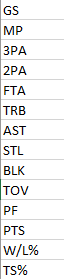

# Waiting for some more features to be removed.

In [ ]:
#split train/test
#X = df.drop(["G","MP","FG","FGA","FG%","eFG%","3P","3P%","2P","2P%","FT","FT%","ORB","DRB","Year","MVP","Pts Won","Tm","Pos","Pts Max","Share","W","L","GB","Rank","PS/G","PA/G"], axis = 1)
y = df.MVP
X = df[["Age", "GS","3PA","2PA","FTA","TRB","AST","STL","BLK","TOV","PF","PTS","W/L%","SRS","TS%"]]
X.dtypes

In [ ]:
indexTest_list = test1.index
player_list = test1.Player
zip_player_index22 = zip(indexTest_list, player_list)
dict_player_index22 = dict(zip_player_index22)
dict_player_index22
player22list = list(dict_player_index22.values())

# feature importance >> https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

model.feature_importances_
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization

#feat_importances = pd.Series(model.feature_importances_, index=X.columns)
#feat_importances.nlargest(10).plot(kind='barh')
#plt.show()

array([0.03797447, 0.05015159, 0.05402246, 0.07715589, 0.12084671,
       0.04614267, 0.08371214, 0.04878989, 0.03587907, 0.06512396,
       0.03744515, 0.14209738, 0.07495044, 0.07427409, 0.0514341 ])

In [ ]:
list(X.columns)
classvalsdf = pd.DataFrame(columns = ["Age", "GS","3PA","2PA","FTA","TRB","AST","STL","BLK","TOV","PF","PTS","W/L%","SRS","TS%"])
classvalsdf

,Age,GS,3PA,2PA,FTA,TRB,AST,STL,BLK,TOV,PF,PTS,W/L%,SRS,TS%


#Number of times to run loop

In [ ]:
n=500

#Average Decision Tree to determine top 10 *variables*

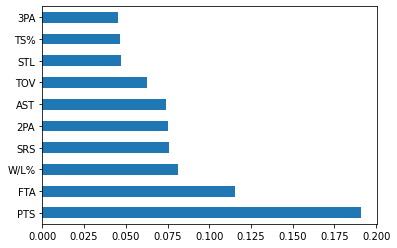

Age     0.035932
GS      0.045177
3PA     0.045229
2PA     0.075153
FTA     0.115474
TRB     0.041007
AST     0.074184
STL     0.047283
BLK     0.031157
TOV     0.062594
PF      0.032116
PTS     0.190987
W/L%    0.081203
SRS     0.075819
TS%     0.046687
dtype: float64


,PTS,FTA,W/L%,SRS,2PA,AST,TOV,STL,TS%,3PA


In [ ]:
classRF = pd.DataFrame(columns = ["Age","GS","3PA","2PA","FTA","TRB","AST","STL","BLK","TOV","PF","PTS","W/L%","SRS","TS%"])

for x in range(0, 100):
  from sklearn.ensemble import RandomForestClassifier
  import matplotlib.pyplot as plt
  X = df[["Age","GS","3PA","2PA","FTA","TRB","AST","STL","BLK","TOV","PF","PTS","W/L%","SRS","TS%"]]
  model = RandomForestClassifier()
  model.fit(X,y)

  classRF.loc[x] =  model.feature_importances_.tolist()

feat_importances = classRF.mean(axis=0)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

print(classRF.mean(axis=0))

col_name = pd.DataFrame(columns = classRF.mean(axis=0).sort_values(ascending=False).head(10).keys()) #ugliest code I've written in my LIFE 3:25am
col_name

#Random Decision Trees to determine top ten variables
Run loop 100 times to get average

---



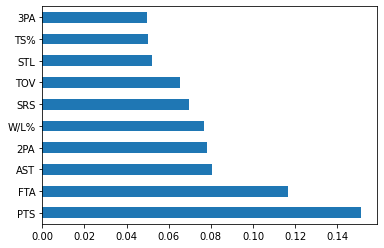

Age     0.039856
GS      0.049569
3PA     0.049670
2PA     0.078124
FTA     0.116430
TRB     0.045532
AST     0.080730
STL     0.052028
BLK     0.037649
TOV     0.065320
PF      0.036993
PTS     0.151368
W/L%    0.076868
SRS     0.069749
TS%     0.050115
dtype: float64


,PTS,FTA,AST,2PA,W/L%,SRS,TOV,STL,TS%,3PA


In [ ]:
classvalsdf = pd.DataFrame(columns = ["Age", "GS","3PA","2PA","FTA","TRB","AST","STL","BLK","TOV","PF","PTS","W/L%","SRS","TS%"])

for x in range(0, n):
  from sklearn.ensemble import ExtraTreesClassifier
  import matplotlib.pyplot as plt
  X = df[["Age", "GS","3PA","2PA","FTA","TRB","AST","STL","BLK","TOV","PF","PTS","W/L%","SRS","TS%"]]
  model = ExtraTreesClassifier()
  model.fit(X,y)

  classvalsdf.loc[x] =  model.feature_importances_.tolist()

feat_importances = classvalsdf.mean(axis=0)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

print(classvalsdf.mean(axis=0))

col_name = pd.DataFrame(columns = classvalsdf.mean(axis=0).sort_values(ascending=False).head(10).keys()) #ugliest code I've written in my LIFE 3:25am
col_name

# Run a For Loop

In [ ]:
acc = 0
inacc= 0
right0 = 0
right1 = 0
right2 = 0
wrong0 = 0
wrong1 = 0
wrong2 = 0
accuracy = 0

X = X[list(col_name)]

test2022 = test1[list(col_name)]

avg_df0 = pd.DataFrame(columns = [col_name])
avg_df1 = pd.DataFrame(columns = [col_name])
avg_df2 = pd.DataFrame(columns = [col_name])

prob22df_1 = pd.DataFrame(columns = [list(range(0,605))])
prob22df_2 = pd.DataFrame(columns = [list(range(0,605))])
                      
for x in range(0, 100):
  avg_list0 = []
  avg_list1 = []
  avg_list2 = []

  trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.2)

  log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=100000) #fit the model
  log_reg.fit(trainX, trainY)
  y_pred = log_reg.predict(testX)

  set(y_pred)

  from sklearn.metrics import accuracy_score
  acc += accuracy_score(testY, y_pred)
  inacc += 1-acc

  testX['Actual_MVP'] = testY
  testX['Predicted_MVP'] = y_pred #predY is the column formed by the model we trained. testY is the true label whether the particular play is MVP, non MVP, or MVP candidate.
  testX

  Player = []
  Year = []
  Team = []
  for row in testX.index:
    Player.append(dict_player_index[row])
    Year.append(dict_year_index[row])
    Team.append(dict_team_index[row])

  testX["Player"] = Player
  testX["Team"] = Team
  testX["Year"] = Year

  import numpy as np
  misclassified = testX.iloc[np.where(testX.Actual_MVP != testX.Predicted_MVP)]
  len(misclassified)
  accurated_classified = testX.iloc[np.where(testX.Actual_MVP == testX.Predicted_MVP)]

  misclassified_0 = misclassified.iloc[np.where(misclassified.Actual_MVP == 0)]
  misclassified_1 = misclassified.iloc[np.where(misclassified.Actual_MVP == 1)]
  misclassified_2 = misclassified.iloc[np.where(misclassified.Actual_MVP == 2)]
  accurated_classified_0 = accurated_classified.iloc[np.where(accurated_classified.Actual_MVP == 0)]
  accurated_classified_1 = accurated_classified.iloc[np.where(accurated_classified.Actual_MVP == 1)]
  accurated_classified_2 = accurated_classified.iloc[np.where(accurated_classified.Actual_MVP == 2)]

  wrong0 += len(misclassified_0)
  wrong1 += len(misclassified_1)
  wrong2 += len(misclassified_2)
  right0 += len(accurated_classified_0)
  right1 += len(accurated_classified_1)
  right2 += len(accurated_classified_2)


  for i in accurated_classified_0.columns[0:10]:
    avg_list0.append(accurated_classified_0[i].mean()) #create a list 
    avg_list1.append(accurated_classified_1[i].mean())
    avg_list2.append(accurated_classified_2[i].mean())
  
  avg_df0.loc[x] = avg_list0
  avg_df1.loc[x] = avg_list1
  avg_df2.loc[x] = avg_list2 #will eventually take a sum of each column then divide by number of row

  prob_test22 = log_reg.predict_proba(test2022)
  prob22_class1 = []
  prob22_class2 = []
  for j in range(len(prob_test22)):
    prob22_class1.append(prob_test22[j][1])
    prob22_class2.append(prob_test22[j][2])

  prob22df_1.loc[x] = prob22_class1
  prob22df_2.loc[x] = prob22_class2

  print(avg_list0)
  print(prob22df_1)


Streaming output truncated to the last 5000 lines.
46  6.951312e-15  1.107981e-10  1.791255e-09  1.080050e-10  2.515625e-10  ...   
47  1.853301e-15  1.456206e-11  4.035655e-10  1.735840e-11  4.464306e-11  ...   

             595           596           597           598           599  \
0   5.033398e-17  3.761864e-13  6.962454e-14  6.120530e-15  9.512758e-13   
1   5.220164e-16  1.533027e-12  3.604054e-13  2.749442e-14  2.300837e-12   
2   1.198868e-16  7.703321e-13  1.965709e-13  9.975954e-15  1.501096e-12   
3   1.404471e-16  8.310747e-13  1.776571e-13  1.115070e-14  1.138645e-12   
4   4.985368e-16  1.811654e-12  5.594595e-13  2.706038e-14  3.266918e-12   
5   1.698736e-16  9.858047e-13  2.501166e-13  1.225103e-14  1.790617e-12   
6   5.294635e-16  1.938737e-12  6.374894e-13  2.464607e-14  3.986933e-12   
7   1.104707e-17  9.704846e-14  2.070981e-14  1.030846e-15  2.079895e-13   
8   5.987553e-17  5.343788e-13  1.527586e-13  5.603680e-15  1.157615e-12   
9   1.214251e-16  1.003794

In [ ]:
stats2022 = stats2022[list(col_name)]

#print(type(prob22df_1.mean(axis=0)))
#print(prob22df_1.mean(axis=0))
#stats2022["MVP Probability"] = prob22df_1.mean(axis=0)

#playindex = pd.Series((i[0] for i in (range(0,605))))



In [ ]:
prob22MVP = pd.DataFrame(columns = ["MVP%", "Candidate%","Player"])
prob22Cand = pd.DataFrame(columns = [player22list])

prob22MVP["MVP%"] = prob22df_1.mean(axis=0)
prob22MVP["Candidate%"] = prob22df_2.mean(axis=0) + prob22df_1.mean(axis=0)
prob22MVP['Player'] = test1['Player'].values
print(prob22MVP)

stats2022['Index'] = (list(range(0,605)))

prob22MVP.reset_index()
print(prob22MVP)

stats2022
result = stats2022.join(prob22MVP, on=['Index'], how='inner').drop(["Index"], axis =1 )
result

             MVP%    Candidate%           Player
0    4.086025e-07  5.985491e-03     Aaron Gordon
1    9.102790e-11  7.975336e-05    Austin Rivers
2    1.307144e-11  3.180041e-05          Bol Bol
3    2.211296e-09  4.424805e-04     Bones Hyland
4    3.777525e-10  1.726294e-04      Bryn Forbes
..            ...           ...              ...
600  5.714464e-15  7.250305e-07     Micah Potter
601  3.776916e-14  1.613684e-06  Rodney McGruder
602  2.291367e-13  5.444000e-06        Saben Lee
603  5.507929e-11  6.555977e-05       Saddiq Bey
604  1.255336e-19  5.484545e-09   Trayvon Palmer

[605 rows x 3 columns]
             MVP%    Candidate%           Player
0    4.086025e-07  5.985491e-03     Aaron Gordon
1    9.102790e-11  7.975336e-05    Austin Rivers
2    1.307144e-11  3.180041e-05          Bol Bol
3    2.211296e-09  4.424805e-04     Bones Hyland
4    3.777525e-10  1.726294e-04      Bryn Forbes
..            ...           ...              ...
600  5.714464e-15  7.250305e-07     Micah Pot

,PTS,FTA,W/L%,SRS,2PA,AST,TOV,STL,TS%,3PA,MVP%,Candidate%,Player
0,15.0,3.1,0.585,2.16,7.7,2.5,1.8,0.6,0.601733,3.5,4.086025e-07,5.985491e-03,Aaron Gordon
1,6.0,0.7,0.585,2.16,1.8,1.3,0.8,0.8,0.544662,3.4,9.102790e-11,7.975336e-05,Austin Rivers
2,2.4,0.4,0.585,2.16,1.6,0.4,0.3,0.1,0.578035,0.3,1.307144e-11,3.180041e-05,Bol Bol
3,10.1,1.8,0.585,2.16,3.1,2.8,1.2,0.6,0.555433,5.2,2.211296e-09,4.424805e-04,Bones Hyland
4,8.8,1.2,0.585,2.16,3.3,1.0,0.7,0.3,0.569358,3.9,3.777525e-10,1.726294e-04,Bryn Forbes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,4.0,0.7,0.280,-7.36,3.0,0.0,0.3,0.3,0.499002,0.7,5.714464e-15,7.250305e-07,Micah Potter
601,5.4,0.5,0.280,-7.36,1.5,0.9,0.5,0.4,0.584416,2.9,3.776916e-14,1.613684e-06,Rodney McGruder
602,5.6,1.9,0.280,-7.36,3.2,2.9,1.0,1.0,0.496806,1.6,2.291367e-13,5.444000e-06,Saben Lee
603,16.1,3.1,0.280,-7.36,6.4,2.8,1.2,0.9,0.527385,7.4,5.507929e-11,6.555977e-05,Saddiq Bey


In [ ]:
result.sort_values(by='MVP%', ascending=False).head(20)

,PTS,FTA,W/L%,SRS,2PA,AST,TOV,STL,TS%,3PA,MVP%,Candidate%,Player
541,27.4,7.3,0.683,5.37,16.2,6.7,3.4,1.2,0.575340,4.5,0.154800,0.953885,Ja Morant
477,29.9,11.4,0.622,3.22,15.0,5.8,3.3,1.1,0.633045,3.6,0.130636,0.983956,Giannis Antetokounmpo
31,30.6,11.8,0.622,2.57,15.9,4.2,3.1,1.1,0.617135,3.7,0.098257,0.971598,Joel Embiid
48,26.8,5.3,0.780,6.94,13.9,4.8,2.4,1.1,0.576791,7.0,0.074797,0.879950,Devin Booker
15,27.1,6.3,0.585,2.16,13.8,7.9,3.8,1.5,0.661880,3.9,0.072744,0.941794,Nikola Jokic
463,28.4,7.5,0.634,3.12,12.8,8.7,4.5,1.2,0.570281,8.8,0.058164,0.867176,Luka Doncic
272,29.9,7.4,0.537,0.82,14.8,6.4,3.5,0.9,0.634658,5.5,0.025885,0.862740,Kevin Durant
196,27.9,7.8,0.561,-0.38,18.3,4.9,2.4,0.9,0.590301,1.9,0.025263,0.828253,DeMar DeRozan
46,14.7,3.1,0.780,6.94,8.3,10.8,2.4,1.9,0.580385,3.1,0.021369,0.772114,Chris Paul
511,28.4,7.3,0.524,1.55,12.3,9.7,4.0,0.9,0.603947,8.0,0.020573,0.829692,Trae Young


In [ ]:
result.sort_values(by='Candidate%', ascending=False).head(20)

,PTS,FTA,W/L%,SRS,2PA,AST,TOV,STL,TS%,3PA,MVP%,Candidate%,Player
477,29.9,11.4,0.622,3.22,15.0,5.8,3.3,1.1,0.633045,3.6,0.130636,0.983956,Giannis Antetokounmpo
31,30.6,11.8,0.622,2.57,15.9,4.2,3.1,1.1,0.617135,3.7,0.098257,0.971598,Joel Embiid
541,27.4,7.3,0.683,5.37,16.2,6.7,3.4,1.2,0.575340,4.5,0.154800,0.953885,Ja Morant
15,27.1,6.3,0.585,2.16,13.8,7.9,3.8,1.5,0.661880,3.9,0.072744,0.941794,Nikola Jokic
48,26.8,5.3,0.780,6.94,13.9,4.8,2.4,1.1,0.576791,7.0,0.074797,0.879950,Devin Booker
463,28.4,7.5,0.634,3.12,12.8,8.7,4.5,1.2,0.570281,8.8,0.058164,0.867176,Luka Doncic
272,29.9,7.4,0.537,0.82,14.8,6.4,3.5,0.9,0.634658,5.5,0.025885,0.862740,Kevin Durant
511,28.4,7.3,0.524,1.55,12.3,9.7,4.0,0.9,0.603947,8.0,0.020573,0.829692,Trae Young
196,27.9,7.8,0.561,-0.38,18.3,4.9,2.4,0.9,0.590301,1.9,0.025263,0.828253,DeMar DeRozan
46,14.7,3.1,0.780,6.94,8.3,10.8,2.4,1.9,0.580385,3.1,0.021369,0.772114,Chris Paul


In [ ]:
bumtotal = right0 + wrong0
mvptotal = right1 + wrong1
candtotal = right1 + right2 + wrong1 + wrong2

candright = right1 + right2

print(right0)
print(bumtotal)

print(right1)
print(mvptotal)

print(candright)
print(candtotal)

97252
97768
34
195
1421
2632


In [ ]:
print(acc)
print(avg_df0)
print(avg_df1)
print(avg_df2)

98.27988047808769
         PTS       FTA      W/L%       SRS       2PA       AST       TOV  \
0  -0.111939 -0.125425 -0.035863 -0.027793 -0.116483 -0.069841 -0.111200   
1  -0.098468 -0.142912  0.027529  0.038068 -0.082544 -0.095562 -0.135183   
2  -0.095078 -0.099038 -0.045635 -0.047230 -0.078049 -0.100844 -0.085225   
3  -0.052848 -0.064843 -0.057636 -0.047996 -0.048057 -0.065268 -0.059445   
4  -0.104740 -0.102035 -0.034861 -0.038186 -0.095088 -0.041193 -0.078264   
..       ...       ...       ...       ...       ...       ...       ...   
95 -0.060034 -0.061218 -0.035196 -0.033524 -0.060126 -0.021166 -0.046707   
96 -0.085738 -0.080682 -0.073992 -0.078274 -0.081132 -0.069201 -0.060868   
97 -0.074093 -0.091735 -0.083197 -0.083299 -0.073108 -0.044875 -0.046243   
98 -0.115793 -0.108323  0.038543  0.043829 -0.109850 -0.116899 -0.123689   
99 -0.098089 -0.107945 -0.075780 -0.075091 -0.086144 -0.066528 -0.074474   

         STL       TS%       3PA  
0  -0.087819 -0.044703 -0.025875  

In [ ]:
type(log_reg)

print(log_reg.coef_)
print()
print(log_reg.intercept_)


#pred2022 = log_reg.predict(test2022)

[[-1.8826698  -0.27985156 -1.26165275 -0.70716534 -0.35854263 -0.74913701
  -0.0180132  -0.18912213 -1.11385407  0.53992805]
 [ 1.18548929  0.25410127  1.28758903  0.73009098  0.7623135   0.7194247
   0.1219342   0.24757211  1.22060474 -0.33680051]
 [ 0.69718051  0.02575029 -0.02593628 -0.02292564 -0.40377087  0.02971231
  -0.103921   -0.05844998 -0.10675067 -0.20312753]]

[ 11.06788221 -12.50538277   1.43750056]


#Create a plot
need divide the values in avg_list by n(number of times we run regression)

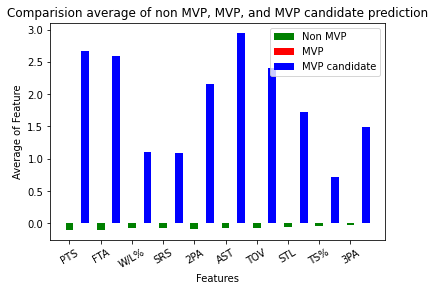

In [ ]:
import matplotlib.pyplot as plt
N = 10
ind = np.arange(N) 
width = 0.25
  
bar1 = plt.bar(ind, avg_list0 , width, color = 'g')
  
bar2 = plt.bar(ind+width, avg_list1, width, color='r')
  
bar3 = plt.bar(ind+width*2, avg_list2, width, color = 'b')
  
plt.xlabel("Features")
plt.ylabel('Average of Feature')
plt.title("Comparision average of non MVP, MVP, and MVP candidate prediction")
  
plt.xticks(np.arange(10),accurated_classified.columns[0:10], rotation = 30)
plt.legend( (bar1, bar2, bar3), ('Non MVP', 'MVP', 'MVP candidate') )
plt.show()

# This model which trained from year 1991 to 2021 matches with 1 player on their top 10 MVP prediction.

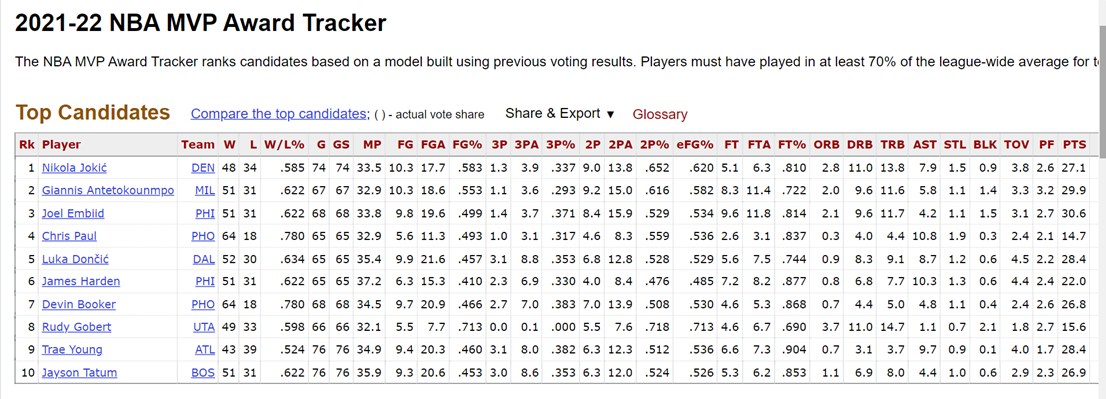